In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Which bacteria are top responders?

In [7]:
df = pd.read_csv('individualized_response_bacteria_species_absolute_abundance.csv',index_col=0)
df = df[(df.P_rsp_corrected<0.05)&(df.meanAbsab_ratio>1)]
df = df[['Variable','P_rsp_corrected','meanAbsab_rs']].sort_values('meanAbsab_rs', ascending=False)
responders_to_show = list(df.Variable)[0:7]
df.head(10)

,Variable,P_rsp_corrected,meanAbsab_rs
198,Muribaculaceae,0.000034,4.955180e+07
139,Faecalibaculum,0.000034,1.171252e+07
166,Lachnospiraceae-NK4A136-group,0.000468,1.158938e+07
41,Bacteroides-acidifaciens,0.004343,9.769171e+06
214,Parabacteroides-goldsteinii,0.008000,7.499777e+06
162,Lachnospiraceae,0.000334,5.066223e+06
84,Clostridia-UCG-014,0.000468,1.628652e+06
250,Ruminococcaceae,0.043546,1.197686e+06
28,Anaerotruncus,0.038786,1.013401e+06
248,Roseburia,0.039900,6.975235e+05


In [8]:
responders_to_show

['Muribaculaceae',
 'Faecalibaculum',
 'Lachnospiraceae-NK4A136-group',
 'Bacteroides-acidifaciens',
 'Parabacteroides-goldsteinii',
 'Lachnospiraceae',
 'Clostridia-UCG-014']

# Plot heatmap of top7 responders

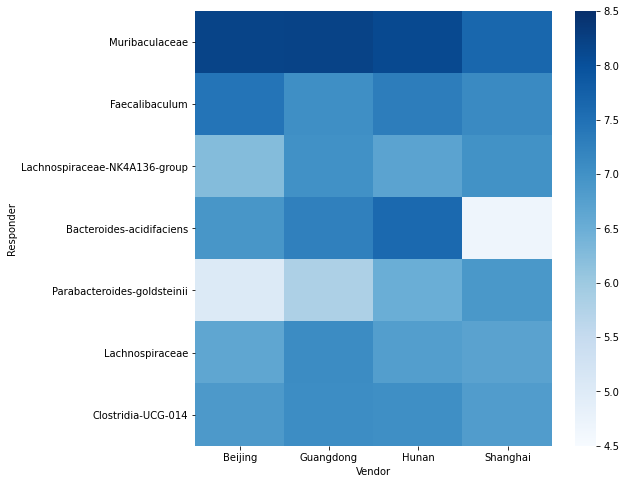

In [10]:
df_meta = pd.read_csv('../../../our_data/meta_data.csv',index_col=0)
df_bac = pd.read_csv('../../../our_data/16S_absolute_abundance_species.csv',index_col=0)
df = pd.merge(df_meta, df_bac[responders_to_show], left_index=True, right_index=True, how='inner')
df = df[df.Diet=='Inulin']

# get mean relative abundance
lines_area = []
all_miceid = list(set(df.MiceID))
for mice in all_miceid:
    df_tmp = df[df.MiceID==mice].sort_values('Day')
    vendor = list(set(df_tmp.Vendor))
    assert len(vendor)==1
    vendor = vendor[0]
    for r in responders_to_show:
        area = simps(df_tmp[r], df_tmp['Day'])/df_tmp['Day'].max()
        lines_area.append([mice,vendor,r,area])
df_area = pd.DataFrame(lines_area, columns=['MiceID','Vendor','Responder','Area'])
df_mean_area = pd.pivot_table(df_area, index='Responder', columns='Vendor', values='Area', aggfunc=np.mean)
df_mean_area = np.log10(df_mean_area)
df_mean_area = df_mean_area.loc[responders_to_show,['Beijing','Guangdong','Hunan','Shanghai']]

# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
_ = sns.heatmap(df_mean_area, ax=ax, cmap='Blues', vmax=8.5, vmin=4.5)
plt.rcParams['svg.fonttype'] = 'none'
fig.savefig("top7_responders.svg", format="svg")